In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        datapath = os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Important Libraries

In [17]:
# import pandas as pd
pd.options.mode.chained_assignment = None
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
# import numpy as np
import nltk
import itertools
import collections

In [4]:
from nltk.corpus import stopwords
# nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
# nltk.download('words') 
from nltk.tokenize import word_tokenize
# nltk.download('punkt')
from nltk.stem import WordNetLemmatizer, PorterStemmer
# nltk.download('wordnet')


[nltk_data] Error loading wordnet: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


False

In [6]:
train_df=pd.read_csv(datapath)
train_df.head()

,Unnamed: 0,AC_ID,AMOUNT,DOC_DATE,NARATION,DR_CR
0,0,3644877,342800.0,01-NOV-22,Cash Withdraw,Debit
1,1,1175256,342800.0,01-NOV-22,Cash Withdrawal From A/C No.:,Credit
2,2,2298226,1500.0,01-NOV-22,"Cash withdraw from Micro Merchant point, MM A/C",Debit
3,3,4066427,1500.0,01-NOV-22,Credit Against Merchant Cash Withdraw Service ...,Credit
4,4,1978564,2550.0,01-NOV-22,"Cash withdraw from Micro Merchant point, MM A/C",Debit


### Extract Narrations

In [7]:
narDf = train_df[['NARATION']]
narDf.columns = ['Narration']
narDf.head()

,Narration
0,Cash Withdraw
1,Cash Withdrawal From A/C No.:
2,"Cash withdraw from Micro Merchant point, MM A/C"
3,Credit Against Merchant Cash Withdraw Service ...
4,"Cash withdraw from Micro Merchant point, MM A/C"


## Preprocessing Start

In [8]:
narDf['Narration'] = narDf['Narration'].str.lower()
narDf.head()

,Narration
0,cash withdraw
1,cash withdrawal from a/c no.:
2,"cash withdraw from micro merchant point, mm a/c"
3,credit against merchant cash withdraw service ...
4,"cash withdraw from micro merchant point, mm a/c"


In [ ]:
# narDf.info()
# narDf = narDf.drop_duplicates()
# narDf.info()

In [9]:
narDf['Narration'] = narDf['Narration'].str.replace('[^A-Za-z\s]+',' ', regex=True)
# narDf.head()

In [ ]:
# narDf.tail()

In [10]:
column_name = 'Narration'
mask = narDf[column_name].isnull() | (narDf[column_name] == '') | (narDf[column_name] == ' ')
narDf = narDf[~mask]

# narDf.info()

In [11]:
narDf[narDf['Narration'] == ' ']

,Narration


### Removing Stopwords

In [12]:
# stopwords = set(stopwords.words('english'))
narDf['Narration'] = narDf['Narration'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stopwords))
narDf.head()

,Narration
0,cash withdraw
1,cash withdrawal c
2,cash withdraw micro merchant point mm c
3,credit merchant cash withdraw service c
4,cash withdraw micro merchant point mm c


In [13]:
narDf.info()
narDf = narDf.sample(frac=0.025)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22544909 entries, 0 to 22546757
Data columns (total 1 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   Narration  object
dtypes: object(1)
memory usage: 344.0+ MB


### **Tokenization**

In [14]:
narDf['Narration'] = narDf['Narration'].apply(lambda data: nltk.word_tokenize(data))
narDf.head()

,Narration
876174,"[cash, withdraw, micro, merchant, point, mm, c]"
20890805,"[debit, debit, card, transaction]"
6903196,"[sms, charge, deduction, year]"
17626033,"[inter, agent, cash, withdraw]"
2208569,"[cash, withdrawal, c]"


### **Lemmatization**

In [15]:
lemmatizer=WordNetLemmatizer()

def lemma_narrations(data):
    return [lemmatizer.lemmatize(word, 'v') for word in data]

narDf['Narration'] = narDf['Narration'].apply(lambda data: lemma_narrations(data))
narDf.head()

LookupError: 
**********************************************************************
  Resource 'corpora/wordnet' not found.  Please use the NLTK
  Downloader to obtain the resource:  >>> nltk.download()
  Searched in:
    - '/root/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************

### **Visualization**

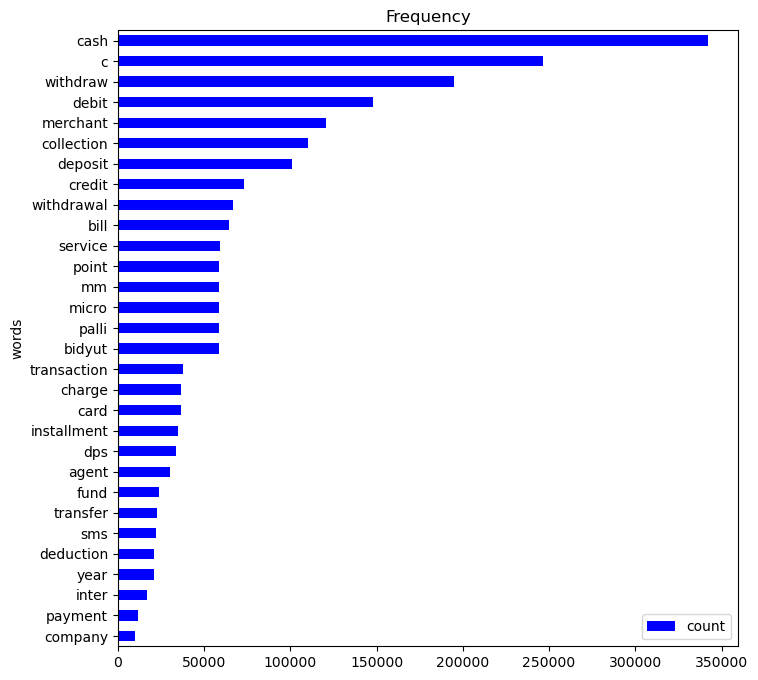

In [18]:
lemmatized_tokens = list(narDf['Narration'])
token_list = list(itertools.chain(*lemmatized_tokens))
counts_no = collections.Counter(token_list)
word_count = pd.DataFrame(counts_no.most_common (30), columns=['words', 'count'])
fig, ax = plt.subplots(figsize=(8, 8))
word_count.sort_values(by='count').plot.barh(x='words',y='count',ax=ax,color='blue')
ax.set_title("Frequency")

plt.show()